In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

## **Read dataset**

In [ ]:
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test'

In [ ]:
image_classes = os.listdir('/kaggle/input/intel-image-classification/seg_train/seg_train')
image_classes

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

## **Data visualization**

In [ ]:
def plot_images(image_classes):
    plt.figure(figsize = (12,12))

    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)

        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(2,3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

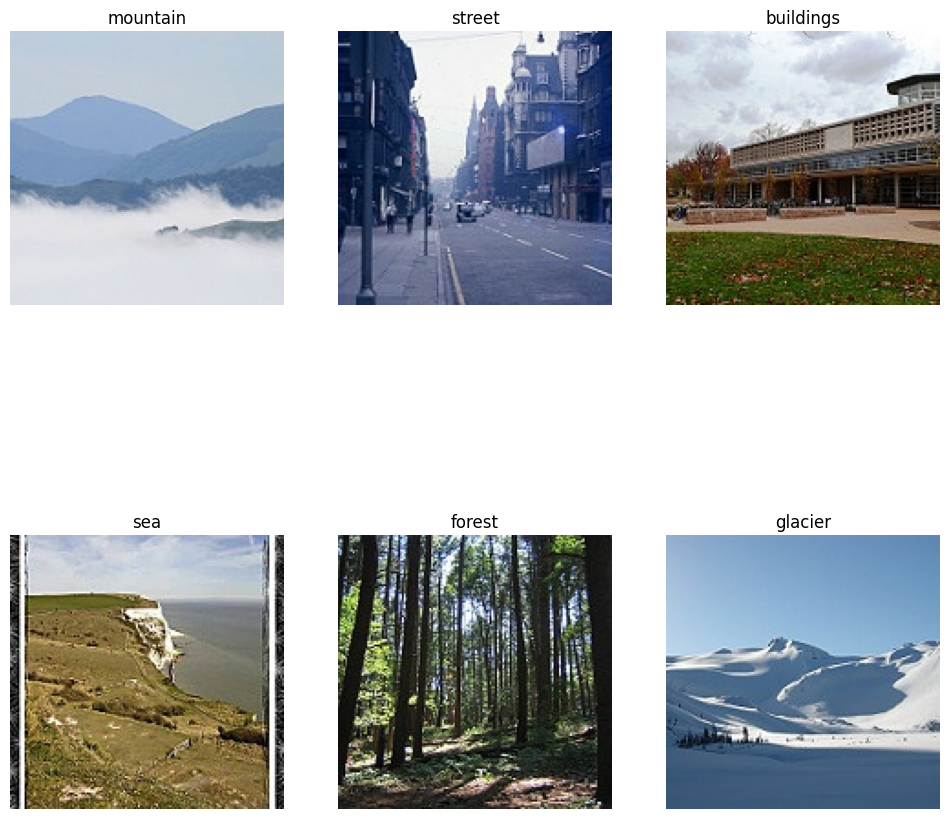

In [ ]:
plot_images(image_classes)

## **Image Preprocessing**

In [ ]:
image_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = image_gen.flow_from_directory(train_path,
                                          target_size = (150,150),
                                          batch_size = 128)

Found 14034 images belonging to 6 classes.


In [ ]:
test_data = image_gen.flow_from_directory(test_path,
                                         target_size = (150,150),
                                         batch_size = 32)

Found 3000 images belonging to 6 classes.


## **Model Building**

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [150,150, 3]))

cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

cnn_model.add(Dense(6, activation = 'softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,727,942 (10.41 MB)

 Trainable params: 2,727,942 (10.41 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Compile & Fit**

In [ ]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [ ]:
model_history = cnn_model.fit(train_data,
                             epochs = 5,
                             validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/110 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.1797 - loss: 1.8502  

I0000 00:00:1711108627.901576     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711108627.919286     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 72/110 ━━━━━━━━━━━━━━━━━━━━ 31s 842ms/step - accuracy: 0.4656 - loss: 1.3472

W0000 00:00:1711108687.585500     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 129s 989ms/step - accuracy: 0.5089 - loss: 1.2468 - val_accuracy: 0.7287 - val_loss: 0.7384
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 248ms/step - accuracy: 0.7356 - loss: 0.7147 - val_accuracy: 0.7793 - val_loss: 0.5952
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.8050 - loss: 0.5378 - val_accuracy: 0.8110 - val_loss: 0.5360
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - accuracy: 0.8399 - loss: 0.4358 - val_accuracy: 0.8173 - val_loss: 0.5035
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.8709 - loss: 0.3556 - val_accuracy: 0.8237 - val_loss: 0.5198


## **Model Performance Visualization**

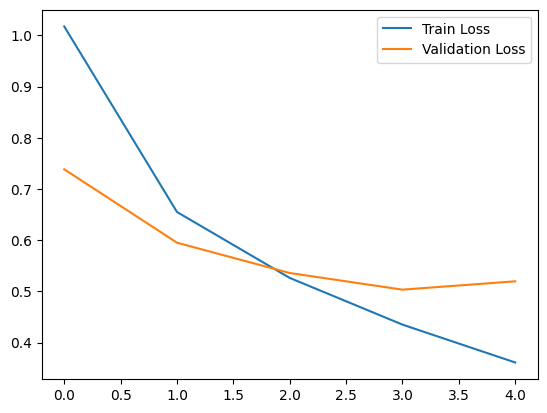

In [ ]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

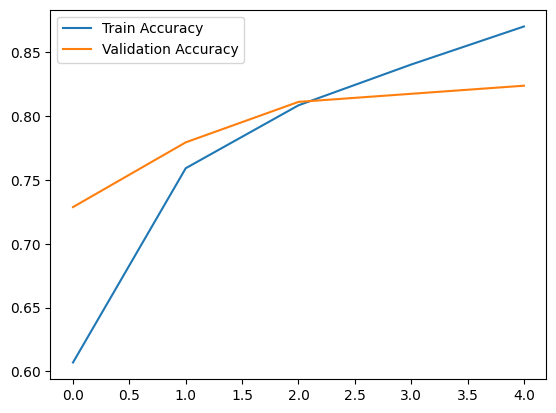

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **Model Evaluation**

In [ ]:
cnn_model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8271 - loss: 0.5353


[0.5198267102241516, 0.8236666917800903]

In [ ]:
cnn_model.evaluate(train_data)

  1/110 ━━━━━━━━━━━━━━━━━━━━ 1:23 765ms/step - accuracy: 0.8984 - loss: 0.3529

W0000 00:00:1711109142.277787     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 223ms/step - accuracy: 0.8951 - loss: 0.3005


W0000 00:00:1711109166.629510     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.300530344247818, 0.8934017419815063]

## **Predict New Image**

In [ ]:
testing_image = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/1003.jpg'

In [ ]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
class_map

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [ ]:
import numpy as np
def prediction(testing_image, actual_label):

    #preprocessing image
    test_img = image.load_img(testing_image, target_size = (150,150))
    test_img_array = image.img_to_array(test_img) / 255
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])


    #make prediction
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    class_img = class_map[predicted_class]

    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title("Actual Label : {} , Predicted Label : {}".format(actual_label, class_img))

    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


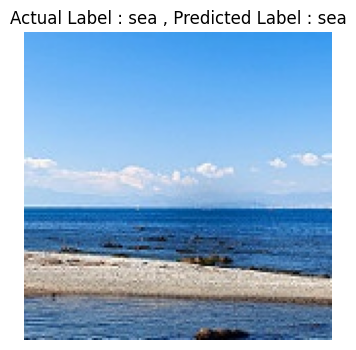

In [ ]:
prediction(testing_image, actual_label = 'sea')

## **Model Save**

In [ ]:
cnn_model.save('Intel_Classification_Model.h5')